In [16]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [17]:
from app.services.graph import GraphRoute
from app.services.algoritms.a_star import optimized_multi_objective_routing
from app.services.algoritms.dijkstra import dijkstra_multi_objective
from app.services.algoritms.aco import aco_optimized_routing
from app.services.solution import plot_pareto
from app.utils.time import time_to_seconds

In [ ]:
graph = GraphRoute(
    origem="Casa da Musica",
    destino="Casino da Póvoa de Varzim, 4490-403",
)

Fusão concluída: 922 paragens no corredor intermodal.


In [ ]:
# --- Parâmetros de Roteamento ---
START_TIME = '08:00:00'
start_sec = time_to_seconds(START_TIME)

print("\n--- ROTEAMENTO MULTI-OBJETIVO E TIME-DEPENDENT ---\n")
print(f" * {graph.G.nodes[graph.origem_node_id]['name']} - {graph.origem}")
print(f"    - (lat: {graph.geo_origem.y} lon: {graph.geo_origem.x})")
print(f" * {graph.G.nodes[graph.destino_node_id]['name']} - {graph.destino}")
print(f"    - (lat: {graph.geo_destino.y} lon: {graph.geo_destino.x})\n")
print(f"Início da Viagem: {START_TIME}")


--- ROTEAMENTO MULTI-OBJETIVO E TIME-DEPENDENT ---

 * Ponto de Partida - Casa da Musica
    - (lat: 41.1589025 lon: -8.6307748)
 * Ponto de Chegada - Casino da Póvoa de Varzim, 4490-403
    - (lat: 41.3787241 lon: -8.7661968)

Início da Viagem: 08:00:00


In [ ]:
print("\n--- Algoritmo A* ---")

a_star_pareto_solutions = optimized_multi_objective_routing(
    graph.G, graph.origem_node_id, graph.destino_node_id, start_sec
)

print(f"\n✅ Algoritmo concluído. Encontradas {len(a_star_pareto_solutions)} soluções não dominadas (Fronteira de Pareto).")


--- Algoritmo A* ---

✅ Algoritmo concluído. Encontradas 3 soluções não dominadas (Fronteira de Pareto).


/Users/diego/Workspace/Simb/mia/trabalhos/CIN_GRUPO6/code/app/services/solution.py:246: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  plt.tight_layout()
/Users/diego/Workspace/Simb/mia/trabalhos/CIN_GRUPO6/code/app/services/solution.py:246: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Arial.
  plt.tight_layout()
/Users/diego/Library/Caches/pypoetry/virtualenvs/cin-grupo6-azr-MXmh-py3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/diego/Library/Caches/pypoetry/virtualenvs/cin-grupo6-azr-MXmh-py3.13/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


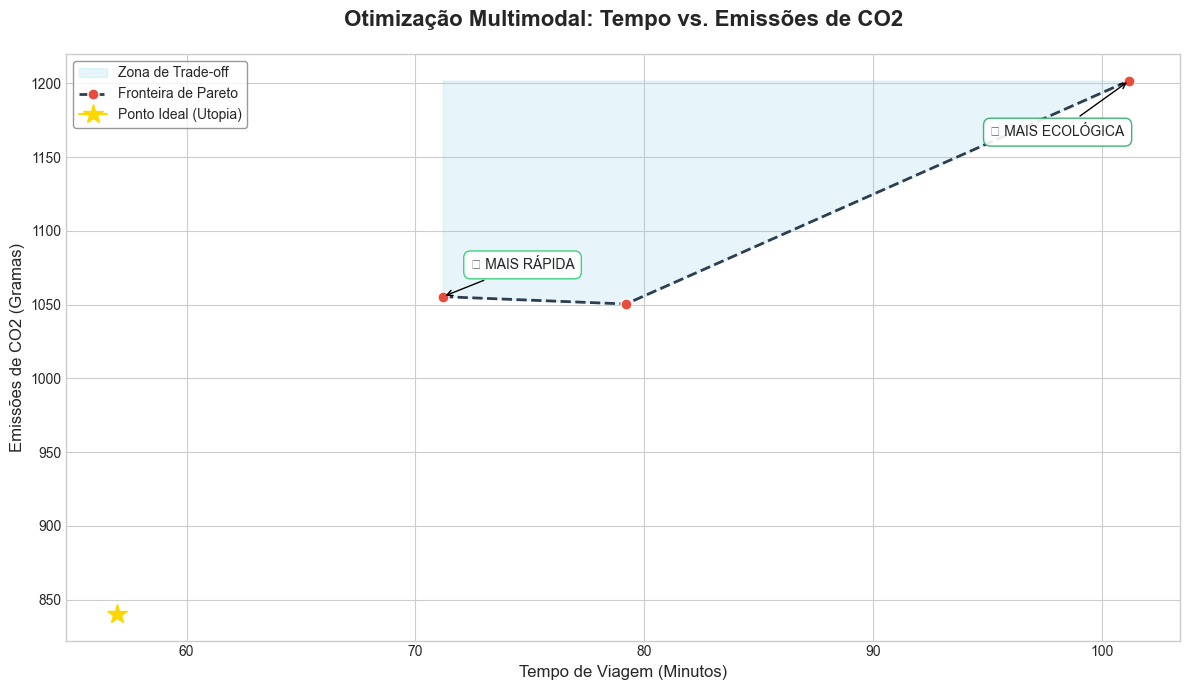

In [ ]:
plot_pareto(a_star_pareto_solutions)

In [9]:
best_sol_time = min(a_star_pareto_solutions, key=lambda s: s.total_time)

In [10]:
best_sol_time.create_route_map(
    graph.G,
    graph.G_walk,
    graph.stops_df,
)

In [12]:
best_sol_co2 = min(a_star_pareto_solutions, key=lambda s: s.total_co2)

In [13]:
best_sol_co2.create_route_map(
    graph.G,
    graph.G_walk,
    graph.stops_df,
)

In [ ]:
best_sol_walk = max(a_star_pareto_solutions, key=lambda s: s.total_walk_km)

In [15]:
best_sol_walk.create_route_map(
    graph.G,
    graph.G_walk,
    graph.stops_df,
)

In [ ]:
print("\n--- Algoritmo ACO ---")

aco_pareto_solutions = aco_optimized_routing(
    graph.G, graph.origem_node_id, graph.destino_node_id, start_sec
)

print(f"\n✅ Algoritmo concluído. Encontradas {len(aco_pareto_solutions)} soluções não dominadas (Fronteira de Pareto).")

In [ ]:
print("\n--- Algoritmo Dijkstra ---")

dijkstra_pareto_solutions = dijkstra_multi_objective(
    graph.G, graph.origem_node_id, graph.destino_node_id, start_sec
)

print(f"\n✅ Algoritmo concluído. Encontradas {len(dijkstra_pareto_solutions)} soluções não dominadas (Fronteira de Pareto).")

In [ ]:
def display_itineraries(solutions):
    if not solutions:
        print("❌ Nenhuma rota encontrada para os critérios selecionados.")
        return

    # Ordenar por tempo para a visualização
    sorted_sols = sorted(solutions, key=lambda s: s.total_time)

    print(f"\n{'='*60}")
    print(f"{'MODO':<12} | {'TEMPO':<10} | {'CO2 (g)':<10} | {'CAMINHADA':<10}")
    print(f"{'-'*60}")

    for i, sol in enumerate(sorted_sols):
        # Identificar o perfil da solução
        profile = "Rápida" if i == 0 else ""
        if sol == min(sorted_sols, key=lambda s: s.total_co2): profile = "Ecológica"
        if sol == max(sorted_sols, key=lambda s: s.total_walk_km): profile = "Ativa"

        mins = int(sol.total_time // 60)
        co2 = round(sol.total_co2, 1)
        walk = round(sol.total_walk_km, 2)
        
        print(f"Opção {i+1:<2} {profile:<10} | {mins:<2} min    | {co2:<10} | {walk:<5} km")

    print(f"{'='*60}\n")

In [ ]:
display_itineraries(a_star_pareto_solutions)

In [ ]:
display_itineraries(aco_pareto_solutions)

In [ ]:
display_itineraries(dijkstra_pareto_solutions)